In [59]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np

C:\Users\GADE.VISHWAS\anaconda3\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\GADE.VISHWAS\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\GADE.VISHWAS\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



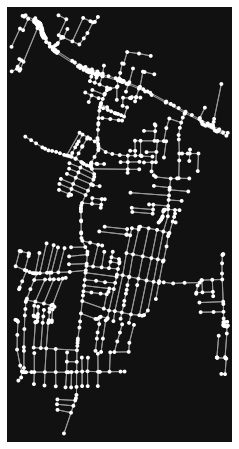

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [60]:
north, east, south, west = 12.9173, 77.6835,12.8957, 77.6720
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive',simplify=False)
# Plotting the map graph 
ox.plot_graph(G)

In [61]:
list(G.nodes(data=True))

a =list(G.edges(data=True))
list(G.edges(data=True))

[(260908311,
  4472266108,
  {'osmid': 1105715133,
   'oneway': True,
   'lanes': '3',
   'name': 'Sarjapura Road',
   'highway': 'primary',
   'maxspeed': '50',
   'length': 38.39}),
 (260908316,
  2387522080,
  {'osmid': 688824200,
   'oneway': True,
   'lanes': '3',
   'name': 'Sarjapura Road',
   'highway': 'primary',
   'maxspeed': '50',
   'length': 9.356}),
 (260908331,
  10199603005,
  {'osmid': 688824200,
   'oneway': True,
   'lanes': '3',
   'name': 'Sarjapura Road',
   'highway': 'primary',
   'maxspeed': '50',
   'length': 6.117}),
 (260908333,
  2099691695,
  {'osmid': 688824200,
   'oneway': True,
   'lanes': '3',
   'name': 'Sarjapura Road',
   'highway': 'primary',
   'maxspeed': '50',
   'length': 42.796}),
 (264845660,
  264845683,
  {'osmid': 24400290,
   'oneway': False,
   'lanes': '2',
   'name': 'Central Jail Road',
   'highway': 'secondary',
   'length': 34.803}),
 (264845660,
  3157670224,
  {'osmid': 688824200,
   'oneway': True,
   'lanes': '3',
   'name': '

In [62]:
list3=[]
list1=[]
edges=[]

In [63]:
for i in range(0,len(a)):
    e=list(G.edges(data=True)) [i][1]
    d=list(G.edges(data=True)) [i][0]
    c=list(G.edges(data=True)) [i][2]['length']
    n = str(d)
    p= str(e)
    tuple_a= (n,p,c)
    list3.append(e)
    edges.append(tuple_a)
    list1.append(d)

edges

[('260908311', '4472266108', 38.39),
 ('260908316', '2387522080', 9.356),
 ('260908331', '10199603005', 6.117),
 ('260908333', '2099691695', 42.796),
 ('264845660', '264845683', 34.803),
 ('264845660', '3157670224', 88.854),
 ('264845683', '4474486981', 5.926),
 ('264845683', '264845660', 34.803),
 ('264845692', '2387579006', 14.125),
 ('264845692', '4472264178', 7.3),
 ('264845701', '10172979413', 7.318),
 ('264845701', '2387579006', 22.247),
 ('264845705', '10172979414', 9.219),
 ('264845705', '3157670219', 25.716),
 ('264845710', '3148667904', 42.68),
 ('264845710', '3148667896', 21.081),
 ('264845713', '3632677681', 11.473),
 ('264845713', '3632677606', 48.469),
 ('264845717', '264845720', 8.617),
 ('264845717', '1315052254', 14.871),
 ('264845720', '9784370281', 43.717),
 ('264845720', '264845717', 8.617),
 ('264845724', '3148668038', 6.649),
 ('264845724', '9784370281', 36.96),
 ('264845728', '2387579012', 7.551),
 ('264845728', '3148668038', 3.568),
 ('264845731', '1315048083', 

In [64]:
origin_point = (12.9142471, 77.6791715) 
destination_point = (12.8962203, 77.6759762)

In [65]:
origin_node = ox.get_nearest_node(G, origin_point) 
destination_node = ox.get_nearest_node(G, destination_point)

In [66]:
origin_node, destination_node

(5807148395, 7465559590)

In [67]:
from networkx import astar_path

In [68]:
def your_heuristic_function(current_node, goal_node):
    # Example: Euclidean distance
    current_coords = G.nodes[current_node]['y'], G.nodes[current_node]['x']
    goal_coords = G.nodes[goal_node]['y'], G.nodes[goal_node]['x']
    return ((current_coords[0] - goal_coords[0]) ** 2 + 
            (current_coords[1] - goal_coords[1]) ** 2) ** 0.5


In [69]:
import time
start_time = time.time()
path = astar_path(G, origin_node, destination_node, heuristic=your_heuristic_function, weight='length')
end_time = time.time()
a_star_runtime = end_time - start_time
print("A* algorithm runtime: ", a_star_runtime)


print(path)

A* algorithm runtime:  0.016326904296875
[5807148395, 5807148394, 5778604776, 2099691637, 2387361293, 4540978393, 2099691629, 10199603001, 260908331, 10199603005, 264845660, 264845683, 4474486981, 4472264178, 264845692, 2387579006, 264845701, 10172979413, 3157670219, 264845705, 10172979414, 3148667896, 264845710, 3148667904, 2417852129, 5928032098, 3632677606, 264845713, 3632677681, 3148668037, 1315052254, 264845717, 264845720, 9784370281, 264845724, 3148668038, 264845728, 2387579012, 264845731, 1315048083, 264845740, 6901661716, 3872540686, 3872540684, 3872533490, 3872533488, 264845751, 264845755, 2387579030, 10172979385, 10172979403, 2206930264, 5776548073, 5920270179, 2206930282, 264845759, 1417462707, 7465559603, 264845763, 10128190717, 10172979379, 2206930293, 3148580198, 267215656, 3148668084, 2206930289, 3148668078, 5926298138, 2206930288, 3148668057, 5926112944, 5926112965, 5926323788, 10182231046, 10182231050, 5926323799, 1458422427, 6182622809, 267215731, 7465559587, 26484578

In [70]:
# getting coordinates of the nodes
# we will store the longitudes and latitudes in following list 
long = [] 
lat = []  
for i in path:
     point = G.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

In [71]:
print(point)

{'y': 12.8967884, 'x': 77.6751591, 'street_count': 3}


In [72]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [73]:
plot_path(lat, long, origin_point, destination_point)